## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count1 = combined_data_df['Mouse ID'].nunique()
mouse_count1

249

In [3]:
#check observation count 
combined_data_df['Mouse ID'].count()

1893

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_vals = combined_data_df[combined_data_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicated_vals

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].nunique()
clean_mouse_count

249

In [45]:
#Check observation count on clean data
clean_df['Mouse ID'].count()

1883

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Group Dataframe by Drug Regimen
regimen_groups = clean_df.groupby(['Drug Regimen'])

#Find mean for each regimen group
regimen_mean = regimen_groups['Tumor Volume (mm3)'].mean()

#Find median for each regimen group
regimen_median = regimen_groups['Tumor Volume (mm3)'].median()

#Find variance for each regimen group
regimen_variance = regimen_groups['Tumor Volume (mm3)'].var()

#Find standard deviation for each regimen group
regimen_std = regimen_groups['Tumor Volume (mm3)'].std()

#Find sem for each regimen group
regimen_sem = regimen_groups['Tumor Volume (mm3)'].sem()


In [47]:
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean": regimen_mean, 
                              "Median":regimen_median, 
                              "Variance":regimen_variance, 
                              "Standard Deviation": regimen_std, 
                              "SEM": regimen_sem})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [184]:
# Using the aggregation method, produce the same summary statistics in a single line

aggregate_df = clean_df.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 
                                                                                  'std', 'sem']})

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Treatment Regimen Observation Count')

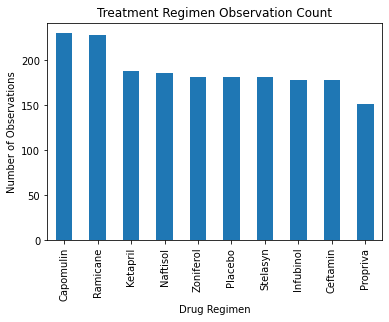

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.5)

# Set labels for axes
regimen_count.set_xlabel("Drug Regimen")
regimen_count.set_ylabel("Number of Observations")
regimen_count.set_title("Treatment Regimen Observation Count")


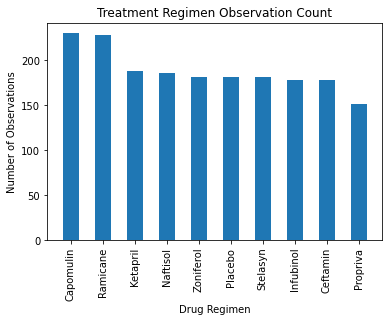

In [180]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Determine number of data points
py_regimen_count = clean_df['Drug Regimen'].value_counts()

# Set X axis
x_axis = np.arange(len(py_regimen_count))

#Create bar plot
plt.bar(x_axis, py_regimen_count, width = 0.5)

# Set names for drug regimen groups
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, py_regimen_count.index.values)

#Change orientation of x labels 
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.title('Treatment Regimen Observation Count')



# Display results
plt.show()

Text(0, 0.5, '')

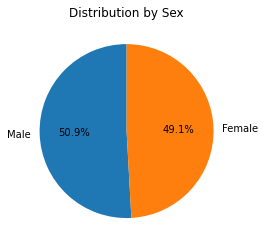

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Find distribition of mice by sex
sex_count = clean_df['Sex'].value_counts()

# Generate Pie chart for sex distribution
sex_distribution_chart = sex_count.plot.pie(startangle=90, title='Distribution by Sex', autopct="%1.1f%%")


# Hide Y label to improve presentation
sex_distribution_chart.set_ylabel('')

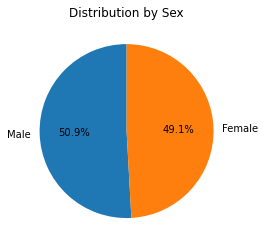

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
py_sex_distribution = clean_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(py_sex_distribution, labels=py_sex_distribution.index.values, startangle=90, autopct="%1.1f%%")
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

maxtimept_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'Timepoint (Max)'})

clean_max_df = pd.merge(clean_df, maxtimept_df, on='Mouse ID')
clean_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint (Max)
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [178]:
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_values = []

for regimen in regimens:
    # create dataframe with all regimens we are interested in 
    selected_regimens_df = clean_max_df.loc[clean_max_df['Drug Regimen'] == regimen]
    
    # find last time point using max and store in another dataframe
    results_df= selected_regimens_df.loc[selected_regimens_df['Timepoint'] == selected_regimens_df['Timepoint (Max)']]
    
    # Get Tumor volume from clean_max_df dataframe
    values = results_df['Tumor Volume (mm3)']
    regimen_values.append(values)
    
    # Calculate Quartiles and IQR
    quartiles = values.quantile([0.25, 0.5, 0.75])
    upperquartile = quartiles[0.75]
    lowerquartile = quartiles[0.25]
    iqr = upperquartile - lowerquartile
    
    #print results
    print(f" IQR for {regimen} is {iqr}")
    
    
    #Find upper and lower bounds
    upper_bound = upperquartile + (1.5 * iqr)
    lower_bound =  lowerquartile - (1.5 * iqr)
    print(f"Upper Bound for {regimen}: {upper_bound}")
    print(f"Lower Bound for {regimen}: {lower_bound}")
    
    
    # Find Outliers
    outliers_count = (values.loc[(clean_max_df['Tumor Volume (mm3)'] >= upper_bound) | 
                     (clean_max_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f" The {regimen} regimen has {outliers_count} outlier(s)")

 IQR for Capomulin is 7.781863460000004
Upper Bound for Capomulin: 51.83201549
Lower Bound for Capomulin: 20.70456164999999
 The Capomulin regimen has 0 outlier(s)
 IQR for Ramicane is 9.098536719999998
Upper Bound for Ramicane: 54.30681135
Lower Bound for Ramicane: 17.912664470000003
 The Ramicane regimen has 0 outlier(s)
 IQR for Infubinol is 11.477135160000003
Upper Bound for Infubinol: 82.74144559000001
Lower Bound for Infubinol: 36.83290494999999
 The Infubinol regimen has 1 outlier(s)
 IQR for Ceftamin is 15.577752179999997
Upper Bound for Ceftamin: 87.66645829999999
Lower Bound for Ceftamin: 25.355449580000002
 The Ceftamin regimen has 0 outlier(s)


([<matplotlib.axis.XTick at 0x115c74ea5e0>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

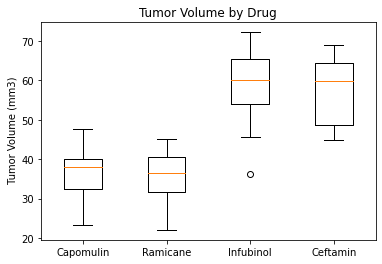

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create Box Plot
plt.boxplot(regimen_values)

# Add Title and Labels
plt.title('Tumor Volume by Drug')
plt.ylabel(' Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

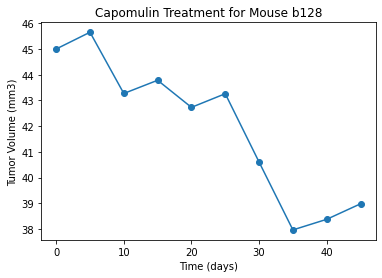

In [145]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse= Capomulin_df.loc[Capomulin_df['Mouse ID'] == "b128",:]
Capomulin_mouse.head()

#create chart
plt.plot(Capomulin_mouse['Timepoint'], Capomulin_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse b128")

plt.show()

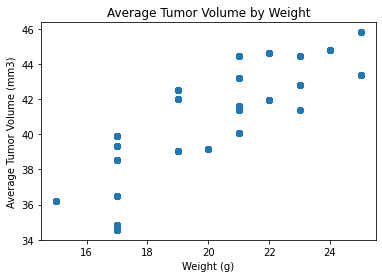

In [146]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Isolate Capomulin regimen oberservations
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#create df with average tumor volumes
Avg_Tumor_Vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

# Merge with capomulin_df
Average_Tumor_Volume_df =pd.merge(capomulin_df, Avg_Tumor_Vol, on = 'Mouse ID', how = "left").rename(columns = {'Tumor Volume (mm3)_y' : 'Avg. Tumor Volume'})
Average_Tumor_Volume_df.head()

# Define Variables for scatter plot 
x_axis = Average_Tumor_Volume_df['Weight (g)']
y_axis = Average_Tumor_Volume_df['Avg. Tumor Volume']


#Create scatter plot 
plt.scatter(x_axis, y_axis)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


# Display plot
plt.show()


## Correlation and Regression

In [166]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_axis, y_axis)
print(f"""The correlation between weight and average tumor volume the Capomulin regimen is {round((correlation[0]), 4)}.""")

The correlation between weight and average tumor volume the Capomulin regimen is 0.8344.


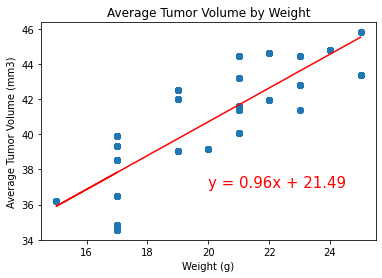

In [177]:
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_values = x * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on to the scatter plot
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regression_values,"r-")

#apply labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


# Add linear equation to the scatterplot
plt.annotate(linear_equation,(20,37), fontsize=15, color="red")


# Display plot
plt.show()


